# Part II - Ford GoBike System
## by David Okpare


## Investigation Overview


> The focus will be on the differences between rides taking by Subscribers and rides taken by Customers. The distances users cover, the schedule (timings) they adopt, and whether or not they share bikes.

## Dataset Overview

> Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The rides details are collected for the month of February 2019 across 329 stations all day.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopy.distance

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_rides = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# calculate distance covered in km
bike_rides['distance_covered'] = bike_rides.apply(lambda x: geopy.distance.distance((x.start_station_latitude, x.start_station_latitude), (x.end_station_latitude, x.end_station_latitude)).km, axis=1)

In [4]:
bike_rides = bike_rides.dropna()

In [5]:
bike_rides.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_covered
62512,166,2019-02-20 16:54:30.3090,2019-02-20 16:57:16.6360,90.0,Townsend St at 7th St,37.771058,-122.402717,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5870,Subscriber,1983.0,Male,No,0.790900
161385,1131,2019-02-05 14:57:48.7190,2019-02-05 15:16:40.3570,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4609,Customer,1996.0,Male,No,1.165300
128768,610,2019-02-10 12:26:49.4110,2019-02-10 12:37:00.3180,105.0,16th St at Prosper St,37.764285,-122.431804,99.0,Folsom St at 15th St,37.767037,-122.415442,5399,Subscriber,1989.0,Male,No,0.390039
29058,565,2019-02-25 07:56:43.3750,2019-02-25 08:06:09.2680,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,58.0,Market St at 10th St,37.776619,-122.417385,5482,Subscriber,1990.0,Male,No,0.002976
138801,600,2019-02-08 06:05:21.5720,2019-02-08 06:15:22.2460,92.0,Mission Bay Kids Park,37.772301,-122.393028,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4997,Subscriber,1992.0,Male,No,3.272064
92458,437,2019-02-15 18:54:23.1660,2019-02-15 19:01:41.0530,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,223.0,16th St Mission BART Station 2,37.764765,-122.420091,6209,Subscriber,1976.0,Male,No,0.791957
179049,458,2019-02-01 15:35:29.2450,2019-02-01 15:43:07.6560,223.0,16th St Mission BART Station 2,37.764765,-122.420091,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5570,Subscriber,1965.0,Male,Yes,0.000000
60474,489,2019-02-20 18:35:49.2110,2019-02-20 18:43:59.0340,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22.0,Howard St at Beale St,37.789756,-122.394643,5341,Subscriber,1970.0,Male,No,1.864504
45585,548,2019-02-22 11:50:49.5490,2019-02-22 11:59:58.4880,258.0,University Ave at Oxford St,37.872355,-122.266447,262.0,West St at University Ave,37.869967,-122.286533,3657,Customer,1987.0,Female,No,0.338343
19840,209,2019-02-26 15:40:30.0730,2019-02-26 15:43:59.3000,369.0,Hyde St at Post St,37.787349,-122.416651,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5043,Subscriber,1979.0,Male,No,0.137980


In [6]:
bike_rides["start_time"] = pd.to_datetime(bike_rides["start_time"])
bike_rides["end_time"] =  pd.to_datetime(bike_rides["end_time"])

In [7]:
bike_rides["start_time_hour"] = bike_rides["start_time"].dt.hour
bike_rides["end_time_hour"] =  bike_rides["end_time"].dt.hour

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Sharing is only for Subscribers.

> The distribution of rides shared per user type shows there were no rides shared among Customers. Observation shows that the bike sharing option was only completed by Subcribers.

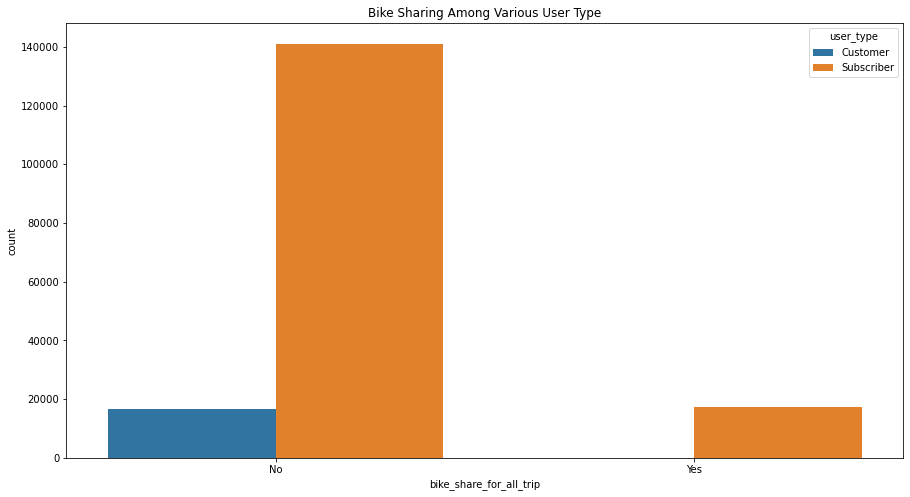

In [8]:
# countplot for bike_share_for_all_trip based on user_type
plt.figure(figsize=(15, 8))
sb.countplot(data=bike_rides, x="bike_share_for_all_trip", hue='user_type')
plt.title("Bike Sharing Among Various User Type")
plt.show()

## Subscribers take more and longer rides

> It's been observed that Subscribers tend to explore longer distances compared to Customers. Subscribers explored more than 15km and upto 60 km in the recorded rides. While Customers tend to settle for shorter distance, as the maximum distance explored was slightly above 12km.

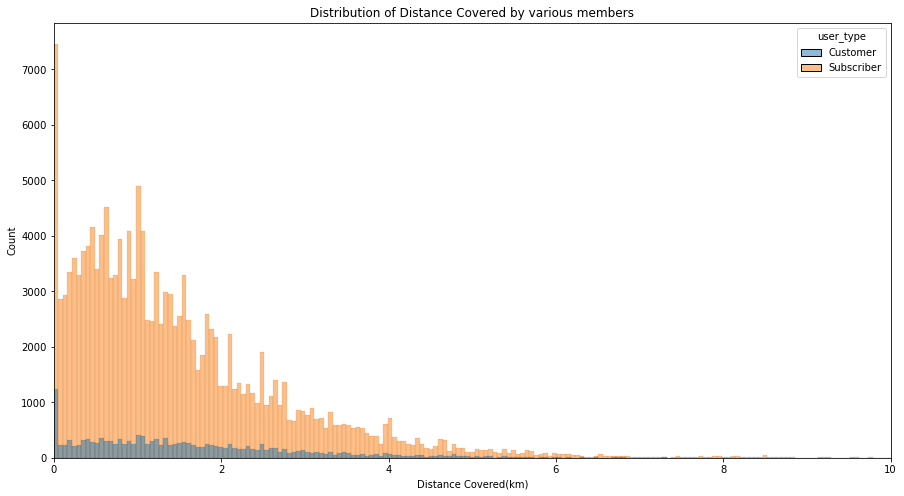

In [9]:
# histogram for distance covered by different users
plt.figure(figsize=(15, 8))
sb.histplot(data=bike_rides, x='distance_covered', hue='user_type')
plt.xlabel("Distance Covered(km)")
plt.xlim((0, 10))
plt.title("Distribution of Distance Covered by various members")
plt.show()

## When do clients take rides?

> Subscribers take rides between 7am to 9am and 4pm to 6pm while Customers had a steady amount of rides from 8am to 5pm. Majority of the rides ends in less than 80 minutes and cover about 12km on average. 


In [10]:
def plot_hour_kde(col_name, title, hue=None):
    """
    Plots a KDE to visualize the hourly distribution of observations.
    """
    sb.set(rc={'figure.figsize': (15,8)})
    g = sb.kdeplot(data=bike_rides, x=col_name, shade=True, hue=hue)
    # set xticks to hourly range
    g.set_xticks(range(24))
    g.set_xticklabels(list(range(24)))
    plt.title(title)
    plt.xlabel("Hour")
    plt.show()

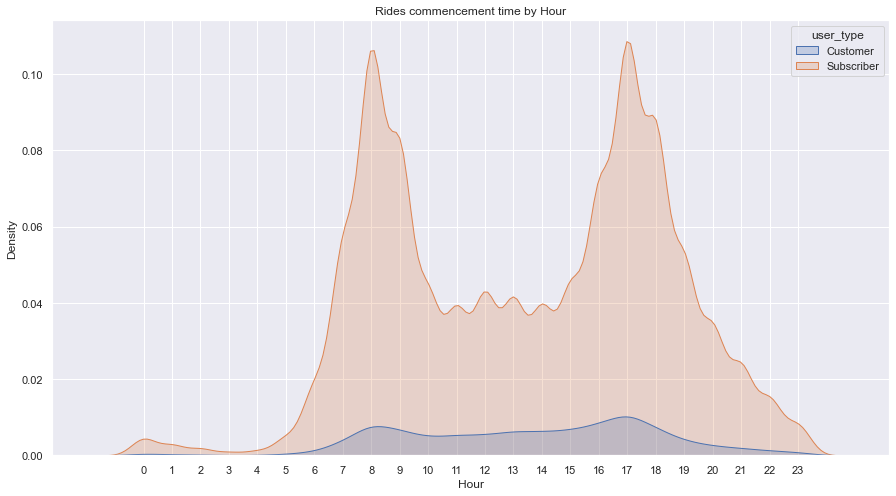

In [11]:
plot_hour_kde('start_time_hour', "Rides commencement time by Hour", 'user_type')

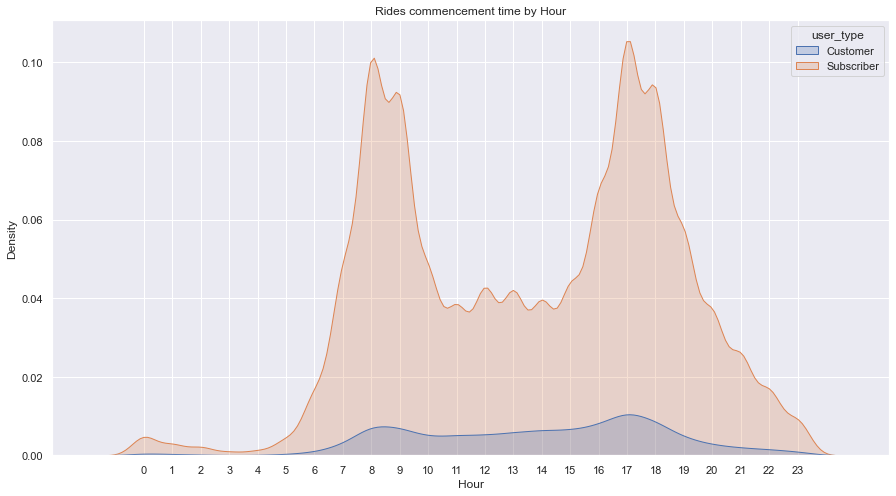

In [12]:
plot_hour_kde('end_time_hour', "Rides commencement time by Hour", 'user_type')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

## Conclusions

There are many insights discovered from the FordBike 2019 dataset. Drawing on the observations found in the charts, these are some focal points.

> Subscribers mostly take rides between 7am to 9am and 4pm to 6pm while Customers have an almost steady increase in rides between 7am and 6pm.

> Subscribers also cover longer distances than Customers. On average, all members cover 12km in distance but Subscribers have explored upto 60km with the bike rides.

In [14]:
!jupyter nbconvert Part_II_Ford_Bikes --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford_Bikes.ipynb to slides
[NbConvertApp] Writing 739885 bytes to Part_II_Ford_Bikes.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Ford_Bikes.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 